In [32]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [33]:
RANDOM_SEED = 42
DIMENSIONS = 3
DATASET_PATH = '/Volumes/KINGSTON/apasem/py/wizard/data/datasets/keypoints.csv'

MODEL_PATH = '/Volumes/KINGSTON/apasem/py/wizard/data/models/keypoints.hdf5'
TFLITE_MODEL_PATH = '/Volumes/KINGSTON/apasem/py/wizard/data/models/keypoints.tflite'

In [34]:
X = np.loadtxt(DATASET_PATH, delimiter=',', dtype='float32', usecols=list(range(1, (21 * DIMENSIONS) + 1)))
y = np.loadtxt(DATASET_PATH, delimiter=',', dtype='int32', usecols=(0))

In [35]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([527, 574, 764, 412]))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=RANDOM_SEED)

print(len(y_train))
print(len(y_test))

2049
228


In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

In [38]:

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * DIMENSIONS, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

models = [
    model_2,
    model_3,
    model_4,
    model_5,
    model_6
    ]

In [39]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_33 (Dropout)        (None, 63)                0         
                                                                 
 dense_60 (Dense)            (None, 20)                1280      
                                                                 
 dropout_34 (Dropout)        (None, 20)                0         
                                                                 
 dense_61 (Dense)            (None, 10)                210       
                                                                 
 dense_62 (Dense)            (None, 4)                 44        
                                                                 
Total params: 1534 (5.99 KB)
Trainable params: 1534 (5.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(MODEL_PATH, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [41]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [42]:
# Model compilation

for m in models:
    m.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

In [43]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[es_callback]
)

Epoch 1/1000
17/17 [==============================] - 0s 5ms/step - loss: 1.4582 - accuracy: 0.2391 - val_loss: 1.3789 - val_accuracy: 0.2544
Epoch 2/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.4066 - accuracy: 0.2367 - val_loss: 1.3700 - val_accuracy: 0.3289
Epoch 3/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.3861 - accuracy: 0.2396 - val_loss: 1.3644 - val_accuracy: 0.3333
Epoch 4/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.3785 - accuracy: 0.2806 - val_loss: 1.3632 - val_accuracy: 0.3333
Epoch 5/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.3780 - accuracy: 0.2879 - val_loss: 1.3608 - val_accuracy: 0.3333
Epoch 6/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.3651 - accuracy: 0.2987 - val_loss: 1.3584 - val_accuracy: 0.3333
Epoch 7/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.3627 - accuracy: 0.3314 - val_loss: 1.3528 - val_accuracy: 0.3333
Epoch 

In [44]:
for m in models:
    m.fit(
        X_train,
        y_train,
        epochs=1000,
        batch_size=128,
        validation_data=(X_test, y_test),
        callbacks=[es_callback]
    )

Epoch 1/1000
17/17 [==============================] - 0s 6ms/step - loss: 1.3832 - accuracy: 0.3036 - val_loss: 1.3526 - val_accuracy: 0.3333
Epoch 2/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.3669 - accuracy: 0.3177 - val_loss: 1.3423 - val_accuracy: 0.3333
Epoch 3/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.3600 - accuracy: 0.3182 - val_loss: 1.3441 - val_accuracy: 0.3465
Epoch 4/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.3514 - accuracy: 0.3407 - val_loss: 1.3371 - val_accuracy: 0.3772
Epoch 5/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.3407 - accuracy: 0.3480 - val_loss: 1.3155 - val_accuracy: 0.3377
Epoch 6/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.3413 - accuracy: 0.3446 - val_loss: 1.3116 - val_accuracy: 0.3553
Epoch 7/1000
17/17 [==============================] - 0s 1ms/step - loss: 1.3412 - accuracy: 0.3416 - val_loss: 1.3092 - val_accuracy: 0.4430
Epoch 

In [51]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 2ms/step - loss: 0.8544 - accuracy: 0.8640


In [45]:
# Model evaluation
for m in models:
    val_loss, val_acc = m.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 1ms/step - loss: 1.0294 - accuracy: 0.6886


In [46]:
# Loading the saved model
# model = tf.keras.models.load_model(MODEL_PATH)

In [47]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 27ms/step
[0.11776574 0.44341516 0.25177372 0.1870453 ]
1


8/8 [==============================] - 0s 553us/step


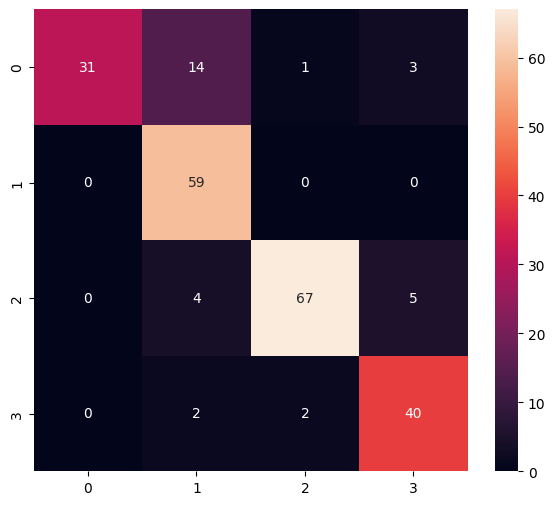

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.63      0.78        49
           1       0.75      1.00      0.86        59
           2       0.96      0.88      0.92        76
           3       0.83      0.91      0.87        44

    accuracy                           0.86       228
   macro avg       0.88      0.86      0.85       228
weighted avg       0.89      0.86      0.86       228



: 

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

8/8 [==============================] - 0s 438us/step


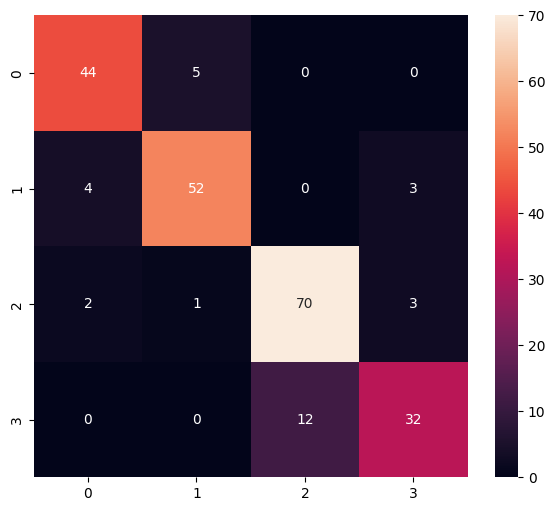

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        49
           1       0.90      0.88      0.89        59
           2       0.85      0.92      0.89        76
           3       0.84      0.73      0.78        44

    accuracy                           0.87       228
   macro avg       0.87      0.86      0.86       228
weighted avg       0.87      0.87      0.87       228

8/8 [==============================] - 0s 531us/step


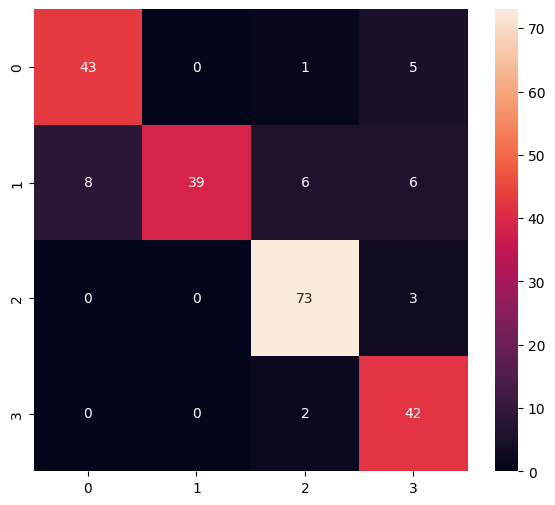

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        49
           1       1.00      0.66      0.80        59
           2       0.89      0.96      0.92        76
           3       0.75      0.95      0.84        44

    accuracy                           0.86       228
   macro avg       0.87      0.86      0.85       228
weighted avg       0.88      0.86      0.86       228

8/8 [==============================] - 0s 457us/step


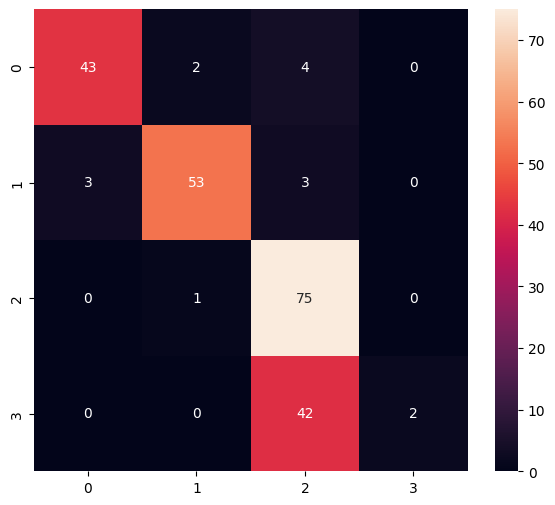

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.88      0.91        49
           1       0.95      0.90      0.92        59
           2       0.60      0.99      0.75        76
           3       1.00      0.05      0.09        44

    accuracy                           0.76       228
   macro avg       0.87      0.70      0.67       228
weighted avg       0.84      0.76      0.70       228

8/8 [==============================] - 0s 467us/step


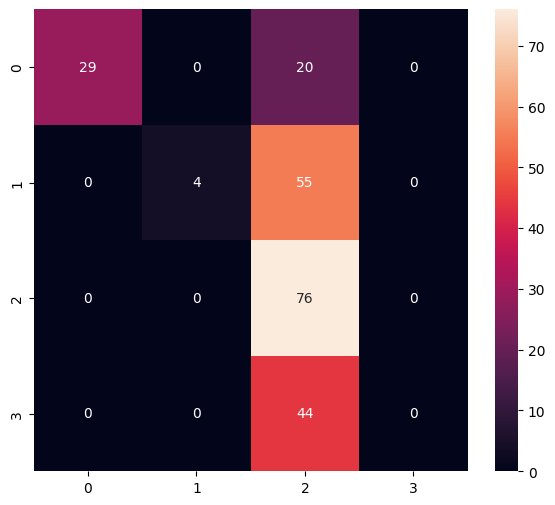

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        49
           1       1.00      0.07      0.13        59
           2       0.39      1.00      0.56        76
           3       0.00      0.00      0.00        44

    accuracy                           0.48       228
   macro avg       0.60      0.41      0.36       228
weighted avg       0.60      0.48      0.38       228

8/8 [==============================] - 0s 463us/step


/Volumes/KINGSTON/apasem/py/wizard/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Volumes/KINGSTON/apasem/py/wizard/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Volumes/KINGSTON/apasem/py/wizard/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

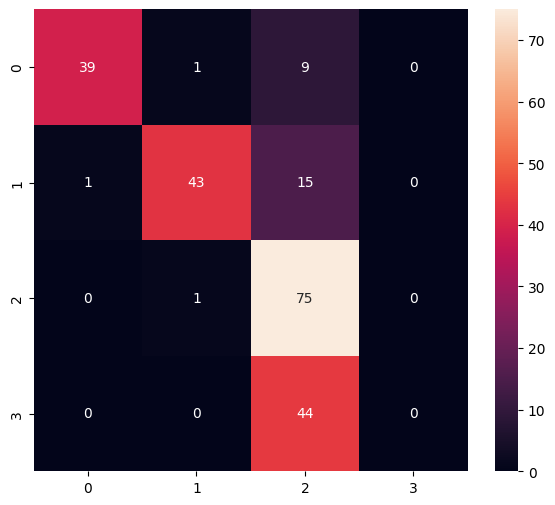

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.80      0.88        49
           1       0.96      0.73      0.83        59
           2       0.52      0.99      0.68        76
           3       0.00      0.00      0.00        44

    accuracy                           0.69       228
   macro avg       0.61      0.63      0.60       228
weighted avg       0.63      0.69      0.63       228



/Volumes/KINGSTON/apasem/py/wizard/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Volumes/KINGSTON/apasem/py/wizard/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Volumes/KINGSTON/apasem/py/wizard/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [49]:
for m in models:
    Y_pred = m.predict(X_test)
    y_pred = np.argmax(Y_pred, axis=1)

    print_confusion_matrix(y_test, y_pred)

In [50]:
# Save as a model dedicated to inference
model.save(MODEL_PATH, include_optimizer=False)
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(TFLITE_MODEL_PATH, 'wb').write(tflite_quantized_model)

/Volumes/KINGSTON/apasem/py/wizard/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /var/folders/ph/6rq_21hx1s12cg_44_svhtfr0000gq/T/tmp2c6ikynz/assets


INFO:tensorflow:Assets written to: /var/folders/ph/6rq_21hx1s12cg_44_svhtfr0000gq/T/tmp2c6ikynz/assets
2023-06-03 23:27:06.200689: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-06-03 23:27:06.200703: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-06-03 23:27:06.200875: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/ph/6rq_21hx1s12cg_44_svhtfr0000gq/T/tmp2c6ikynz
2023-06-03 23:27:06.201569: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-06-03 23:27:06.201575: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/ph/6rq_21hx1s12cg_44_svhtfr0000gq/T/tmp2c6ikynz
2023-06-03 23:27:06.203904: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-06-03 23:27:06.234983: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

4632